<a href="https://colab.research.google.com/github/jrrombaldo/notebooks/blob/main/Verizon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install verispy

In [33]:
!rm -rf data VCDB sample_data .git


In [34]:
# !git clone https://github.com/vz-risk/VCDB.git
! \
    mkdir VCDB \
    && cd VCDB \
    && git init \
    && git remote add origin https://github.com/vz-risk/VCDB.git \
    && git sparse-checkout init \
    && git sparse-checkout set data/json/validated/ \
    && git pull --depth=5 origin master

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/VCDB/.git/
remote: Enumerating objects: 14869, done.
remote: Counting objects: 100% (14869/14869), done.
remote: Compressing objects: 100% (3714/3714), done.
remote: Total 14869 (delta 12114), reused 11283 (delta 11153), pack-reused 0
Receiving objects: 100% (14869/14869), 60.91 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (12114/12114), done.
From https://github.com/vz-risk/VCDB
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> ori

In [35]:
from verispy import VERIS
import pandas as pd
from IPython.display import display, HTML
import warnings

In [38]:
warnings.filterwarnings("ignore")

v = VERIS(json_dir='./VCDB/data/json/validated/')

veris_df = v.json_to_df(verbose=True)

Found 9897 json files.
Loading schema
Loading JSON files to DataFrame.


100%|██████████| 9897/9897 [00:01<00:00, 5875.69it/s]


Finished loading JSON files to dataframe.
Dropped 5 rows with duplicated incident_id values.
Building DataFrame with enumerations.
Building enumeration columns.


100%|██████████| 175/175 [00:15<00:00, 11.31it/s]


Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame


In [40]:
print (veris_df.shape)
# [ print(k) for k in v.enumerations.keys()]
v.enumerations

(9892, 2443)


{'security_incident': ['Confirmed',
  'Suspected',
  'Near miss',
  'False positive'],
 'confidence': ['High', 'Medium', 'Low', 'None'],
 'timeline.compromise.unit': ['Seconds',
  'Minutes',
  'Hours',
  'Days',
  'Weeks',
  'Months',
  'Years',
  'Never',
  'NA',
  'Unknown'],
 'timeline.exfiltration.unit': ['Seconds',
  'Minutes',
  'Hours',
  'Days',
  'Weeks',
  'Months',
  'Years',
  'Never',
  'NA',
  'Unknown'],
 'timeline.discovery.unit': ['Seconds',
  'Minutes',
  'Hours',
  'Days',
  'Weeks',
  'Months',
  'Years',
  'Never',
  'NA',
  'Unknown'],
 'timeline.containment.unit': ['Seconds',
  'Minutes',
  'Hours',
  'Days',
  'Weeks',
  'Months',
  'Years',
  'Never',
  'NA',
  'Unknown'],
 'victim.employee_count': ['Small',
  '1 to 10',
  '11 to 100',
  '101 to 1000',
  'Large',
  '1001 to 10000',
  '10001 to 25000',
  '25001 to 50000',
  '50001 to 100000',
  'Over 100000',
  'Unknown'],
 'victim.government': ['Federal',
  'Regional',
  'Local',
  'Unknown',
  'Other',
  'NA']

In [41]:
for key in v.enumerations.keys():
    tmp = v.enum_summary(veris_df, key)


    # checking N
    if tmp.shape[0] > 1:
        n         = tmp['n'][1]
        sum       = tmp['x'].sum()
        unknown   = tmp[(tmp['enum'] == 'Unknown')]['x'].values
        unknown   = unknown[0] if unknown.size ==1 else 0
        freq_sum  = tmp['freq'].sum()


        if not sum - unknown == n:
            print(f"\n\n\tPROBLEM!!! sum({sum}) - unknown({unknown}) =>({sum-unknown}) != n({n}), a diff of {sum-unknown-n}")


        tmp.loc[len(tmp.index)] = ['Total', sum, '-', freq_sum]
        tmp.drop(columns=['n'], inplace=True)





    tmp.rename(columns={'x':'Total', 'freq':'(%)', 'enum':key}, inplace=True)
    tmp['(%)'] = tmp['(%)'].map('{:.2%}'.format)
    # tmp.set_index(key, inplace=True)

    print ('\n\n')

    display(HTML(tmp.to_html()))

,security_incident,Total,(%)
0,Confirmed,9811,99.18%
1,Suspected,73,0.74%
2,Near miss,8,0.08%
3,False positive,0,0.00%
4,Total,9892,100.00%


,confidence,Total,(%)
0,High,2173,80.93%
1,Medium,378,14.08%
2,Low,133,4.95%
3,None,1,0.04%
4,Total,2685,100.00%


,timeline.compromise.unit,Total,(%)
0,NA,527,47.91%
1,Minutes,333,30.27%
2,Seconds,156,14.18%
3,Hours,45,4.09%
4,Days,20,1.82%
5,Months,13,1.18%
6,Weeks,3,0.27%
7,Years,3,0.27%
8,Never,0,0.00%
9,Unknown,320,nan%


,timeline.exfiltration.unit,Total,(%)
0,NA,593,69.36%
1,Minutes,136,15.91%
2,Seconds,62,7.25%
3,Hours,24,2.81%
4,Days,21,2.46%
5,Weeks,10,1.17%
6,Months,5,0.58%
7,Never,2,0.23%
8,Years,2,0.23%
9,Unknown,291,nan%


,timeline.discovery.unit,Total,(%)
0,Months,784,34.95%
1,Days,415,18.50%
2,Hours,340,15.16%
3,Years,331,14.76%
4,Weeks,164,7.31%
5,Minutes,150,6.69%
6,Seconds,34,1.52%
7,NA,25,1.11%
8,Never,0,0.00%
9,Unknown,391,nan%


,timeline.containment.unit,Total,(%)
0,Days,259,31.70%
1,Hours,217,26.56%
2,NA,91,11.14%
3,Minutes,78,9.55%
4,Weeks,69,8.45%
5,Months,57,6.98%
6,Seconds,19,2.33%
7,Never,16,1.96%
8,Years,11,1.35%
9,Unknown,291,nan%


,victim.employee_count,Total,(%)
0,1001 to 10000,1292,18.32%
1,101 to 1000,1128,16.00%
2,Over 100000,1069,15.16%
3,Large,983,13.94%
4,11 to 100,837,11.87%
5,Small,472,6.69%
6,10001 to 25000,459,6.51%
7,1 to 10,451,6.40%
8,25001 to 50000,223,3.16%
9,50001 to 100000,138,1.96%


,victim.government,Total,(%)
0,NA,7541,98.96%
1,Regional,31,0.41%
2,Local,26,0.34%
3,Federal,20,0.26%
4,Other,2,0.03%
5,Unknown,2272,nan%
6,Total,9892,100.00%




	PROBLEM!!! sum(9896) - unknown(219) =>(9677) != n(9673.0), a diff of 4.0





,victim.country,Total,(%)
0,US,7219,74.63%
1,GB,574,5.93%
2,CA,369,3.82%
3,AU,161,1.66%
4,IN,138,1.43%
5,NZ,103,1.06%
6,CN,65,0.67%
7,JP,62,0.64%
8,IE,60,0.62%
9,DE,57,0.59%


,victim.revenue.iso_currency_code,Total,(%)
0,USD,510,99.41%
1,GBP,3,0.58%
2,AED,0,0.00%
3,PKR,0,0.00%
4,NPR,0,0.00%
5,NZD,0,0.00%
6,OMR,0,0.00%
7,PAB,0,0.00%
8,PEN,0,0.00%
9,PGK,0,0.00%




	PROBLEM!!! sum(4361) - unknown(1681) =>(2680) != n(1583.0), a diff of 1097.0





,action.hacking.variety,Total,(%)
0,Exploit vuln,1007,63.61%
1,Backdoor,736,46.49%
2,Use of stolen creds,359,22.68%
3,DoS,166,10.49%
4,Brute force,150,9.48%
5,SQLi,105,6.63%
6,Other,42,2.65%
7,Abuse of functionality,41,2.59%
8,Forced browsing,19,1.20%
9,MitM,8,0.51%




	PROBLEM!!! sum(3278) - unknown(939) =>(2339) != n(2308.0), a diff of 31.0





,action.hacking.vector,Total,(%)
0,Web application,1996,86.48%
1,Backdoor,221,9.57%
2,Other,40,1.73%
3,Physical access,17,0.74%
4,Desktop sharing software,14,0.61%
5,Partner,14,0.61%
6,Desktop sharing,12,0.52%
7,Command shell,11,0.48%
8,VPN,9,0.39%
9,3rd party desktop,3,0.13%




	PROBLEM!!! sum(1267) - unknown(0) =>(1267) != n(1113.0), a diff of 154.0





,action.hacking.result,Total,(%)
0,Infiltrate,1022,91.82%
1,Exfiltrate,212,19.05%
2,Deploy payload,21,1.89%
3,Elevate,9,0.81%
4,Other,2,0.18%
5,Lateral movement,1,0.09%
6,NA,0,0.00%
7,Persist,0,0.00%
8,Unknown,0,nan%
9,Total,1267,113.84%




	PROBLEM!!! sum(3946) - unknown(171) =>(3775) != n(1462.0), a diff of 2313.0





,action.malware.variety,Total,(%)
0,Backdoor or C2,998,68.26%
1,Backdoor,980,67.03%
2,Ransomware,321,21.96%
3,C2,202,13.82%
4,Capture stored data,186,12.72%
5,Downloader,177,12.11%
6,Spyware/Keylogger,149,10.19%
7,Export data,125,8.55%
8,Scan network,106,7.25%
9,Exploit vuln,92,6.29%




	PROBLEM!!! sum(1663) - unknown(467) =>(1196) != n(1154.0), a diff of 42.0





,action.malware.vector,Total,(%)
0,Direct install,860,74.52%
1,Email attachment,223,19.32%
2,Web application,28,2.43%
3,Web application - drive-by,26,2.25%
4,Download by malware,11,0.95%
5,Email link,10,0.87%
6,Web application - download,7,0.61%
7,Remote injection,6,0.52%
8,Email autoexecute,4,0.35%
9,Email unknown,4,0.35%




	PROBLEM!!! sum(951) - unknown(0) =>(951) != n(914.0), a diff of 37.0





,action.malware.result,Total,(%)
0,Exfiltrate,814,89.06%
1,Infiltrate,70,7.66%
2,Deploy payload,44,4.81%
3,Elevate,23,2.52%
4,Lateral movement,0,0.00%
5,NA,0,0.00%
6,Other,0,0.00%
7,Persist,0,0.00%
8,Unknown,0,nan%
9,Total,951,104.05%




	PROBLEM!!! sum(1399) - unknown(17) =>(1382) != n(1356.0), a diff of 26.0





,action.social.variety,Total,(%)
0,Extortion,773,57.01%
1,Phishing,431,31.79%
2,Pretexting,63,4.65%
3,Bribery,59,4.35%
4,Forgery,18,1.33%
5,Influence,15,1.11%
6,Other,11,0.81%
7,Propaganda,3,0.22%
8,Scam,3,0.22%
9,Baiting,2,0.15%




	PROBLEM!!! sum(1400) - unknown(73) =>(1327) != n(1302.0), a diff of 25.0





,action.social.vector,Total,(%)
0,Email,1193,91.63%
1,In-person,55,4.22%
2,Phone,19,1.46%
3,Documents,17,1.31%
4,SMS,13,1.00%
5,Software,12,0.92%
6,Web application,8,0.61%
7,Social media,4,0.31%
8,Other,3,0.23%
9,IM,2,0.15%




	PROBLEM!!! sum(2129) - unknown(345) =>(1784) != n(1030.0), a diff of 754.0





,action.social.target,Total,(%)
0,End-user or employee,848,82.33%
1,End-user,739,71.75%
2,Finance,43,4.17%
3,System admin,27,2.62%
4,Executive,25,2.43%
5,Customer,24,2.33%
6,Other,22,2.14%
7,Human resources,20,1.94%
8,Cashier,13,1.26%
9,Call center,6,0.58%




	PROBLEM!!! sum(859) - unknown(0) =>(859) != n(844.0), a diff of 15.0





,action.social.result,Total,(%)
0,Other,736,87.20%
1,Infiltrate,69,8.18%
2,Exfiltrate,43,5.10%
3,Elevate,8,0.95%
4,Deploy payload,3,0.36%
5,Lateral movement,0,0.00%
6,NA,0,0.00%
7,Persist,0,0.00%
8,Unknown,0,nan%
9,Total,859,101.78%




	PROBLEM!!! sum(2719) - unknown(50) =>(2669) != n(2623.0), a diff of 46.0





,action.error.variety,Total,(%)
0,Misdelivery,970,36.98%
1,Loss,415,15.82%
2,Publishing error,397,15.14%
3,Misconfiguration,331,12.62%
4,Disposal error,321,12.24%
5,Other,76,2.90%
6,Programming error,60,2.29%
7,Gaffe,41,1.56%
8,Malfunction,34,1.30%
9,Classification error,6,0.23%




	PROBLEM!!! sum(2682) - unknown(1386) =>(1296) != n(1288.0), a diff of 8.0





,action.error.vector,Total,(%)
0,Carelessness,1192,92.55%
1,Inadequate processes,59,4.58%
2,Random error,15,1.17%
3,Other,13,1.01%
4,Inadequate technology,11,0.85%
5,Inadequate personnel,6,0.47%
6,Web application,0,0.00%
7,Unknown,1386,nan%
8,Total,2682,100.62%




	PROBLEM!!! sum(2076) - unknown(47) =>(2029) != n(1743.0), a diff of 286.0





,action.misuse.variety,Total,(%)
0,Privilege abuse,1199,68.79%
1,Possession abuse,249,14.29%
2,Data mishandling,233,13.37%
3,Knowledge abuse,195,11.19%
4,Unapproved hardware,58,3.33%
5,Email misuse,31,1.78%
6,Net misuse,19,1.09%
7,Unapproved workaround,16,0.92%
8,Unapproved software,9,0.52%
9,Illicit content,8,0.46%




	PROBLEM!!! sum(1859) - unknown(187) =>(1672) != n(1603.0), a diff of 69.0





,action.misuse.vector,Total,(%)
0,LAN access,1128,70.37%
1,Physical access,435,27.14%
2,Remote access,50,3.12%
3,Non-corporate,30,1.87%
4,Other,27,1.68%
5,Web application,2,0.12%
6,Unknown,187,nan%
7,Total,1859,104.30%




	PROBLEM!!! sum(182) - unknown(1) =>(181) != n(180.0), a diff of 1.0





,action.misuse.result,Total,(%)
0,Exfiltrate,177,98.33%
1,Other,2,1.11%
2,Elevate,1,0.56%
3,Infiltrate,1,0.56%
4,Deploy payload,0,0.00%
5,Lateral movement,0,0.00%
6,NA,0,0.00%
7,Persist,0,0.00%
8,Unknown,1,nan%
9,Total,182,100.56%




	PROBLEM!!! sum(2017) - unknown(6) =>(2011) != n(1618.0), a diff of 393.0





,action.physical.variety,Total,(%)
0,Theft,1182,73.05%
1,Disabled controls,280,17.30%
2,Skimmer,194,11.99%
3,Tampering,183,11.31%
4,Bypassed controls,64,3.96%
5,Surveillance,56,3.46%
6,Assault,29,1.79%
7,Snooping,12,0.74%
8,Connection,3,0.18%
9,Destruction,3,0.18%




	PROBLEM!!! sum(1620) - unknown(470) =>(1150) != n(1138.0), a diff of 12.0





,action.physical.vector,Total,(%)
0,Victim work area,359,31.55%
1,Personal vehicle,196,17.22%
2,Victim public area,173,15.20%
3,Victim grounds,113,9.93%
4,Public facility,85,7.47%
5,Partner facility,68,5.97%
6,Victim secure area,57,5.01%
7,Personal residence,56,4.92%
8,Partner vehicle,25,2.20%
9,Public vehicle,11,0.97%




	PROBLEM!!! sum(176) - unknown(0) =>(176) != n(140.0), a diff of 36.0





,action.physical.result,Total,(%)
0,Exfiltrate,122,87.14%
1,Infiltrate,46,32.86%
2,Deploy payload,6,4.29%
3,Elevate,2,1.43%
4,Lateral movement,0,0.00%
5,NA,0,0.00%
6,Other,0,0.00%
7,Persist,0,0.00%
8,Unknown,0,nan%
9,Total,176,125.72%


,action.environmental.variety,Total,(%)
0,Fire,2,33.33%
1,Power failure,2,33.33%
2,Humidity,1,16.67%
3,Hurricane,1,16.67%
4,Deterioration,0,0.00%
5,Other,0,0.00%
6,Volcano,0,0.00%
7,Vermin,0,0.00%
8,Tsunami,0,0.00%
9,Tornado,0,0.00%




	PROBLEM!!! sum(80) - unknown(0) =>(80) != n(53.0), a diff of 27.0





,action.unknown.result,Total,(%)
0,Infiltrate,46,86.79%
1,Exfiltrate,27,50.94%
2,Elevate,7,13.21%
3,Deploy payload,0,0.00%
4,Lateral movement,0,0.00%
5,NA,0,0.00%
6,Other,0,0.00%
7,Persist,0,0.00%
8,Unknown,0,nan%
9,Total,80,150.94%




	PROBLEM!!! sum(5826) - unknown(2846) =>(2980) != n(2965.0), a diff of 15.0





,actor.external.variety,Total,(%)
0,Organized crime,1479,49.88%
1,Unaffiliated,526,17.74%
2,Activist,486,16.39%
3,State-affiliated,221,7.45%
4,Former employee,77,2.60%
5,Other,53,1.79%
6,Nation-state,51,1.72%
7,Customer,24,0.81%
8,Force majeure,22,0.74%
9,Competitor,18,0.61%




	PROBLEM!!! sum(5626) - unknown(1470) =>(4156) != n(4127.0), a diff of 29.0





,actor.external.motive,Total,(%)
0,Financial,3036,73.56%
1,Ideology,396,9.59%
2,Espionage,290,7.03%
3,Fun,242,5.86%
4,Grudge,114,2.76%
5,NA,36,0.87%
6,Other,22,0.53%
7,Secondary,15,0.36%
8,Fear,4,0.10%
9,Convenience,1,0.02%




	PROBLEM!!! sum(5656) - unknown(3955) =>(1701) != n(1663.0), a diff of 38.0





,actor.external.country,Total,(%)
0,RU,871,52.38%
1,US,329,19.78%
2,CN,62,3.73%
3,GB,49,2.95%
4,PK,42,2.53%
5,SY,38,2.28%
6,UA,31,1.86%
7,TR,26,1.56%
8,KP,23,1.38%
9,CA,22,1.32%




	PROBLEM!!! sum(4447) - unknown(2508) =>(1939) != n(1930.0), a diff of 9.0





,actor.internal.variety,Total,(%)
0,End-user,792,41.04%
1,System admin,319,16.53%
2,Other,235,12.18%
3,Developer,125,6.48%
4,Executive,108,5.60%
5,Cashier,75,3.89%
6,Manager,72,3.73%
7,Finance,71,3.68%
8,Doctor or nurse,56,2.90%
9,Human resources,32,1.66%




	PROBLEM!!! sum(4443) - unknown(833) =>(3610) != n(3594.0), a diff of 16.0





,actor.internal.motive,Total,(%)
0,NA,2231,62.08%
1,Financial,778,21.65%
2,Fun,276,7.68%
3,Convenience,93,2.59%
4,Espionage,88,2.45%
5,Grudge,75,2.09%
6,Other,45,1.25%
7,Ideology,18,0.50%
8,Fear,5,0.14%
9,Secondary,1,0.03%


,actor.internal.job_change,Total,(%)
0,Let go,58,32.04%
1,Hired,55,30.39%
2,Resigned,55,30.39%
3,Other,11,6.08%
4,Personal issues,1,0.55%
5,Reprimanded,1,0.55%
6,Demoted,0,0.00%
7,Job eval,0,0.00%
8,Lateral move,0,0.00%
9,Passed over,0,0.00%




	PROBLEM!!! sum(454) - unknown(155) =>(299) != n(297.0), a diff of 2.0





,actor.partner.motive,Total,(%)
0,NA,222,74.75%
1,Financial,48,16.16%
2,Espionage,9,3.03%
3,Convenience,8,2.69%
4,Fun,5,1.68%
5,Other,4,1.35%
6,Grudge,2,0.67%
7,Secondary,1,0.34%
8,Fear,0,0.00%
9,Ideology,0,0.00%


,actor.partner.country,Total,(%)
0,US,137,73.26%
1,GB,14,7.49%
2,IN,7,3.74%
3,AU,6,3.21%
4,CA,5,2.67%
5,IE,2,1.07%
6,NZ,2,1.07%
7,CN,2,1.07%
8,JP,2,1.07%
9,FR,1,0.53%




	PROBLEM!!! sum(15172) - unknown(665) =>(14507) != n(9309.0), a diff of 5198.0





,asset.assets.variety,Total,(%)
0,S - Web application,2461,26.44%
1,S - Database,1786,19.19%
2,M - Documents,1725,18.53%
3,U - Desktop or laptop,1342,14.42%
4,S - File,903,9.70%
5,P - End-user or employee,866,9.30%
6,P - End-user,740,7.95%
7,U - Desktop,719,7.72%
8,S - Unknown,688,7.39%
9,U - Laptop,624,6.70%


,asset.assets.amount,Total,n,(%)


,asset.ownership,Total,(%)
0,Partner,87,59.18%
1,Victim,58,39.46%
2,Customer,1,0.68%
3,NA,1,0.68%
4,Employee,0,0.00%
5,Other,0,0.00%
6,Unknown,0,nan%
7,Total,147,100.00%




	PROBLEM!!! sum(9895) - unknown(8841) =>(1054) != n(1051.0), a diff of 3.0





,asset.cloud,Total,(%)
0,On-Premise Asset(s),788,74.98%
1,External Cloud Asset(s),154,14.65%
2,NA,101,9.61%
3,Other,11,1.05%
4,Unknown,8841,nan%
5,Total,9895,100.29%


,asset.hosting,Total,(%)
0,External - unknown environment,196,100.00%
1,External - dedicated environment,0,0.00%
2,External - shared environment,0,0.00%
3,Internal,0,0.00%
4,NA,0,0.00%
5,Other,0,0.00%
6,Unknown,1,nan%
7,Total,197,100.00%


,asset.management,Total,(%)
0,External,226,69.54%
1,Internal,99,30.46%
2,Co-managed,0,0.00%
3,NA,0,0.00%
4,Other,0,0.00%
5,Unknown,1,nan%
6,Total,326,100.00%




	PROBLEM!!! sum(1433) - unknown(9) =>(1424) != n(1421.0), a diff of 3.0





,asset.role,Total,(%)
0,IT,1387,97.61%
1,NA,25,1.76%
2,OT,6,0.42%
3,Other,6,0.42%
4,Unknown,9,nan%
5,Total,1433,100.21%


,asset.country,Total,(%)
0,US,237,64.75%
1,GB,28,7.65%
2,CA,20,5.46%
3,AU,12,3.28%
4,IN,11,3.00%
5,NZ,6,1.64%
6,DE,6,1.64%
7,IL,4,1.09%
8,ES,3,0.82%
9,MX,3,0.82%


,attribute.confidentiality.data_disclosure,Total,(%)
0,Yes,6847,76.09%
1,Potentially,2068,22.98%
2,No,83,0.92%
3,Unknown,219,nan%
4,Total,9217,100.00%


,attribute.confidentiality.data.amount,Total,n,(%)




	PROBLEM!!! sum(11257) - unknown(1236) =>(10021) != n(8065.0), a diff of 1956.0





,attribute.confidentiality.data.variety,Total,(%)
0,Personal,3996,49.55%
1,Medical,2665,33.04%
2,Payment,887,11.00%
3,Credentials,739,9.16%
4,Internal,564,6.99%
5,Bank,340,4.22%
6,Secrets,298,3.69%
7,System,201,2.49%
8,Classified,200,2.48%
9,Other,87,1.08%




	PROBLEM!!! sum(7131) - unknown(109) =>(7022) != n(6799.0), a diff of 223.0





,attribute.confidentiality.data_victim,Total,(%)
0,Customer,3242,47.68%
1,Patient,2259,33.23%
2,Employee,553,8.13%
3,Other,393,5.78%
4,Student,250,3.68%
5,Partner,204,3.00%
6,Victim organization,121,1.78%
7,Unknown,109,nan%
8,Total,7131,103.28%




	PROBLEM!!! sum(7252) - unknown(1734) =>(5518) != n(5491.0), a diff of 27.0





,attribute.confidentiality.state,Total,(%)
0,Stored unencrypted,2594,47.24%
1,Stored,1972,35.91%
2,Processed,235,4.28%
3,Transmitted unencrypted,210,3.82%
4,Printed,182,3.31%
5,Transmitted,154,2.80%
6,Stored encrypted,136,2.48%
7,Transmitted encrypted,19,0.35%
8,Other,16,0.29%
9,Unknown,1734,nan%




	PROBLEM!!! sum(4704) - unknown(37) =>(4667) != n(3017.0), a diff of 1650.0





,attribute.integrity.variety,Total,(%)
0,Software installation,1646,54.56%
1,Alter behavior,1384,45.87%
2,Modify data,352,11.67%
3,Hardware tampering,312,10.34%
4,Fraudulent transaction,271,8.98%
5,Modify configuration,238,7.89%
6,Repurpose,224,7.42%
7,Defacement,139,4.61%
8,Misrepresentation,56,1.86%
9,Modify privileges,19,0.63%




	PROBLEM!!! sum(2726) - unknown(6) =>(2720) != n(2654.0), a diff of 66.0





,attribute.availability.variety,Total,(%)
0,Loss,2061,77.66%
1,Interruption,303,11.42%
2,Obscuration,283,10.66%
3,Destruction,44,1.66%
4,Degradation,26,0.98%
5,Other,3,0.11%
6,Acceleration,0,0.00%
7,Unknown,6,nan%
8,Total,2726,102.49%


,attribute.availability.duration.unit,Total,(%)
0,Never,84,33.33%
1,Days,67,26.59%
2,Hours,49,19.44%
3,Weeks,17,6.75%
4,Minutes,13,5.16%
5,Months,12,4.76%
6,NA,7,2.78%
7,Years,3,1.19%
8,Seconds,0,0.00%
9,Unknown,65,nan%


,targeted,Total,(%)
0,Opportunistic,1392,62.23%
1,NA,551,24.63%
2,Targeted,294,13.14%
3,Unknown,396,nan%
4,Total,2633,100.00%




	PROBLEM!!! sum(3911) - unknown(224) =>(3687) != n(3685.0), a diff of 2.0





,discovery_method.external.variety,Total,(%)
0,Actor disclosure,1806,49.01%
1,Customer,793,21.52%
2,Law enforcement,300,8.14%
3,Security researcher,193,5.24%
4,Found documents,172,4.67%
5,Suspicious traffic,153,4.15%
6,Unrelated 3rd party,104,2.82%
7,Fraud detection,101,2.74%
8,Audit,24,0.65%
9,Other,24,0.65%


,discovery_method.internal.variety,Total,(%)
0,Reported by employee,825,67.79%
1,It review,109,8.96%
2,Incident response,57,4.68%
3,Break in discovered,44,3.62%
4,Log review,43,3.53%
5,Financial audit,33,2.71%
6,Infrastructure monitoring,27,2.22%
7,Other,23,1.89%
8,Fraud detection,22,1.81%
9,Nids,10,0.82%


,discovery_method.partner.variety,Total,(%)
0,Monitoring service,17,45.95%
1,Other,15,40.54%
2,Audit,3,8.11%
3,Incident response,2,5.41%
4,Antivirus,0,0.00%
5,Unknown,7,nan%
6,Total,44,100.00%




	PROBLEM!!! sum(1307) - unknown(7) =>(1300) != n(1275.0), a diff of 25.0





,value_chain.development.variety,Total,(%)
0,Exploit,748,58.67%
1,Email,430,33.73%
2,Ransomware,72,5.65%
3,Payload,21,1.65%
4,Other,12,0.94%
5,NA,5,0.39%
6,Website,4,0.31%
7,Trojan,3,0.24%
8,Bot,2,0.16%
9,Exploit Kits,2,0.16%




	PROBLEM!!! sum(39) - unknown(19) =>(20) != n(19.0), a diff of 1.0





,value_chain.non-distribution services.variety,Total,(%)
0,C2,6,31.58%
1,NA,6,31.58%
2,Marketplace,3,15.79%
3,Proxy,3,15.79%
4,Other,2,10.53%
5,Counter AV,0,0.00%
6,DNS,0,0.00%
7,Escrow,0,0.00%
8,Hashcracking,0,0.00%
9,VPN,0,0.00%




	PROBLEM!!! sum(520) - unknown(17) =>(503) != n(487.0), a diff of 16.0





,value_chain.targeting.variety,Total,(%)
0,Email addresses,441,90.55%
1,Lost or stolen credentials,18,3.70%
2,Organizational Information,13,2.67%
3,Vulnerabilities,10,2.05%
4,Misconfigurations,6,1.23%
5,Personal Information,6,1.23%
6,Other,3,0.62%
7,NA,2,0.41%
8,Weaknesses,2,0.41%
9,Default credentials,1,0.21%




	PROBLEM!!! sum(1231) - unknown(18) =>(1213) != n(1212.0), a diff of 1.0





,value_chain.distribution.variety,Total,(%)
0,Email,1193,98.43%
1,Other,8,0.66%
2,NA,5,0.41%
3,Direct,3,0.25%
4,Website,2,0.17%
5,Botnet,1,0.08%
6,Partner,1,0.08%
7,Compromised server,0,0.00%
8,Loader,0,0.00%
9,Phone,0,0.00%




	PROBLEM!!! sum(408) - unknown(4) =>(404) != n(397.0), a diff of 7.0





,value_chain.cash-out.variety,Total,(%)
0,Cryptocurrency,321,80.86%
1,Sell stolen goods,48,12.09%
2,Direct,16,4.03%
3,Fraud,12,3.02%
4,NA,3,0.76%
5,Other,2,0.50%
6,Hijacked rewards,1,0.25%
7,Purchase stolen goods,1,0.25%
8,Provide service,0,0.00%
9,Unknown,4,nan%




	PROBLEM!!! sum(26) - unknown(18) =>(8) != n(7.0), a diff of 1.0





,value_chain.money laundering.variety,Total,(%)
0,Cryptocurrency tumbling,3,42.86%
1,NA,3,42.86%
2,Bank,1,14.29%
3,Company,1,14.29%
4,Employment,0,0.00%
5,Gambling,0,0.00%
6,Other,0,0.00%
7,Physical,0,0.00%
8,Provide service,0,0.00%
9,Re-shipping,0,0.00%


,impact.overall_rating,Total,(%)
0,Insignificant,123,52.12%
1,Distracting,46,19.49%
2,Damaging,40,16.95%
3,Painful,24,10.17%
4,Catastrophic,3,1.27%
5,Unknown,5772,nan%
6,Total,6008,100.00%


,impact.iso_currency_code,Total,(%)
0,USD,174,78.03%
1,GBP,30,13.45%
2,EUR,10,4.48%
3,THB,2,0.90%
4,KRW,1,0.45%
5,CZK,1,0.45%
6,CAD,1,0.45%
7,INR,1,0.45%
8,ZAR,1,0.45%
9,SGD,1,0.45%




	PROBLEM!!! sum(1228) - unknown(0) =>(1228) != n(463), a diff of 765





,impact.loss.variety,Total,(%)
0,Asset and fraud,260,56.16%
1,Legal and regulatory,251,54.21%
2,Response and recovery,182,39.31%
3,Brand damage,139,30.02%
4,Business disruption,139,30.02%
5,Competitive advantage,126,27.21%
6,Operating costs,126,27.21%
7,Other,5,1.08%
8,Total,1228,265.23%


,impact.loss.rating,Total,(%)
0,Major,0,nan%
1,Minor,0,nan%
2,Moderate,0,nan%
3,None,0,nan%
4,Unknown,0,nan%
5,Total,0,0.00%


,impact.loss.amount,Total,n,(%)


,cost_corrective_action,Total,(%)
0,Simple and cheap,10,71.43%
1,Something in-between,4,28.57%
2,Difficult and expensive,0,0.00%
3,Unknown,2,nan%
4,Total,16,100.00%


In [47]:
v.enum_summary(veris_df, 'action.social.variety')


,enum,x,n,freq
0,Extortion,773,1356.0,0.57006
1,Phishing,431,1356.0,0.31785
2,Pretexting,63,1356.0,0.04646
3,Bribery,59,1356.0,0.04351
4,Forgery,18,1356.0,0.01327
5,Influence,15,1356.0,0.01106
6,Other,11,1356.0,0.00811
7,Propaganda,3,1356.0,0.00221
8,Scam,3,1356.0,0.00221
9,Baiting,2,1356.0,0.00147


In [48]:
v.enum_summary(veris_df, 'action', by='attribute')

,by,enum,x,n,freq
0,attribute.Availability,Physical,1207,2651.0,0.45530
1,attribute.Availability,Hacking,732,2651.0,0.27612
2,attribute.Availability,Error,476,2651.0,0.17955
3,attribute.Availability,Malware,331,2651.0,0.12486
4,attribute.Availability,Misuse,84,2651.0,0.03169
5,attribute.Availability,Social,79,2651.0,0.02980
6,attribute.Availability,Environmental,9,2651.0,0.00339
7,attribute.Availability,Unknown,6,NaN,NaN
8,attribute.Confidentiality,Hacking,2813,8997.0,0.31266
9,attribute.Confidentiality,Error,2632,8997.0,0.29254


In [49]:
v.enum_summary(veris_df, 'action.social.variety', ci_method='wilson', ci_level=0.5)

,enum,x,n,freq,method,lower,upper
0,Extortion,773,1356.0,0.57006,wilson,0.56097,0.57910
1,Phishing,431,1356.0,0.31785,wilson,0.30938,0.32644
2,Pretexting,63,1356.0,0.04646,wilson,0.04275,0.05047
3,Bribery,59,1356.0,0.04351,wilson,0.03992,0.04740
4,Forgery,18,1356.0,0.01327,wilson,0.01134,0.01554
5,Influence,15,1356.0,0.01106,wilson,0.00930,0.01315
6,Other,11,1356.0,0.00811,wilson,0.00663,0.00993
7,Propaganda,3,1356.0,0.00221,wilson,0.00150,0.00326
8,Scam,3,1356.0,0.00221,wilson,0.00150,0.00326
9,Baiting,2,1356.0,0.00147,wilson,0.00092,0.00236


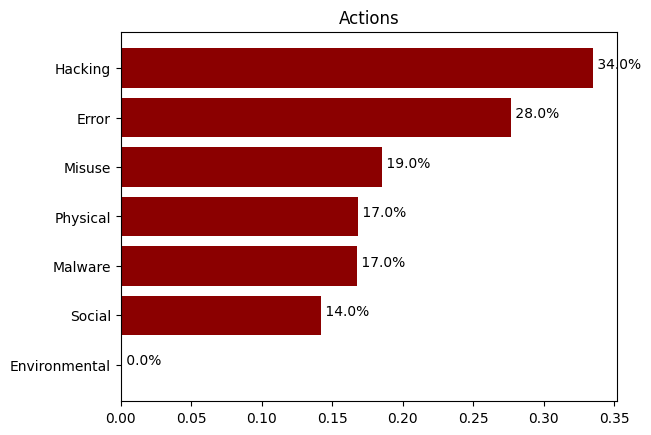

In [50]:
actionci_df = v.enum_summary(veris_df, 'action')

action_fig = v.plot_barchart(actionci_df, 'Actions')

action_fig.show()